# CETO Spring 2022 
[Competition website](https://sites.google.com/view/tolymp/ceto/ceto-4)

Computer Experiment Team Olympiad is a team competition organised by students from Taras Shevchenko National University of Kyiv. The competition is organised for students of 9th-11th grade, but I decided to try to solve myself one of the tasks. I have already participated previously in this olympiad as the school student and worked on the similar problem from CETO 2019 Autumn that later inspired me for my research with which I have reached National level of Junior Academy of Sciences of Ukraine.

By doing this small research I want to practise my math skills as well as skills with Jupyter notebooks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
print("Hello World")

Hello World


# Зламаний коник

Колега доктора Бiодольского, професор Комашевський, дослiджує родину незвичайних коникiв (усi коники з цiєї родини мають однаковi бiологофiзичнi характеристики). Вiн випускає їх у вiдкрите поле та спостерiгає за їх стрибками. Довжина кожного стрибку складає 30 см. Пiсля кожного стрибку з ймовiрнiстю 𝑝 = 0,2 коник пiдвертає ногу. Якщо коник пiдвертає ногу, то йому необхiдно 𝑡 = 0,5 хвилини на вiдпочинок, пiсля чого вiн знову може продовжити стрибати (якщо коник ногу не пiдвертає, то вiдпочинок не потрiбен). Знайдiть середню швидкiсть 𝑣 коника з такої родини. Для цього виконайте наступнi завдання:
    
1. Вважаючи що час стрибка коника 1 с (i надалi вважайте час стрибку 1 с, якщо це не уточнюється), знайдiть середню швидкiсть для 𝑁 = 500, 1000, 1500, . . . стрибкiв (чим бiльше експериментiв, тим краще), побудуйте графiк залежностi 𝑣(𝑁 );

2. Знайдiть залежнiсть середньої швидкостi 𝑣 вiд ймовiрностi 𝑝 пiдвертання ноги;

3. Нехай коник зламався i почав стрибати з ймовiрнiстю 𝑝𝑠 = 0,3 на вiдстань 15 см i з ймовiрнiстю  ̄𝑝𝑠 = 1 − 0,3 = 0,7 на вiдстань 30 см. За умови що вiн пiсля кожного стрибка з ймовiрнiстю 𝑝 = 0,2 пiдвертає ногу, знайдiть середню швидкiсть коника;

4. Нехай коник зовсiм з’їхав з глузду i стрибаючи на вiдстань 15 см, вiн почав пiдвертати ногу з ймовiрнiстю 0,2, а стрибаючи на вiдстань 30 см — з ймовiрнiстю 0,3. Враховуючи що ймовiрнiсть стрибка на 15 см 𝑝𝑠 = 0,3, а на вiдстань 30 см:  ̄𝑝𝑠 = 1 − 0,3 = 0,7, знайдiть середню швидкiсть коника;

5. (extra) Нехай час стрибка коника рiвний 𝑇 , причому 𝑇 < 1с. Розв’яжiть пункт 1 за рiзних значень параметра 𝑇 , зокрема дослiдiть як поводиться середня швидкiсть при 𝑇 → 0.

## Constants

In [2]:
p = 0.2 #probability of breaking the leg
jump_length = 30 * 10**-2 #jump length
t = 0.5 * 60 #timeout after leg was broken
actions = ["j", "b"] #j - jump made, b - leg broken
probabilities = [1 - p, p]

## Sub-task  1
> Вважаючи що час стрибка коника 1 с (i надалi вважайте час стрибку 1 с, якщо це не уточнюється), знайдiть середню швидкiсть для 𝑁 = 500, 1000, 1500, . . . стрибкiв (чим бiльше експериментiв, тим краще), побудуйте графiк залежностi 𝑣(𝑁 );

Let's create a function that will take a number o jumps as paramter and will simulate a single run with that nubmer of jumps.

In [3]:
def time_needed_for_fixed_number_of_jumps(number_of_jumps):
    result = 0
    journey = np.random.choice(actions, size = number_of_jumps, p = probabilities)
    for i in range (len(journey) - 1):
        if journey[i] == "b":
            result += 30
        result += 1
    result += 1
    return result

In [4]:
#Average spped for 500 jumps
time_500_jumps = time_needed_for_fixed_number_of_jumps(500)
average_speed_500 = jump_length * 500 / time_500_jumps
print("Average speed when doing 500 jumps: ", average_speed_500)

#Average spped for 1000 jumps
time_1000_jumps = time_needed_for_fixed_number_of_jumps(1000)
average_speed_1000 = jump_length * 1000 / time_1000_jumps
print("Average speed when doing 1000 jumps: ", average_speed_1000)

#Average spped for 1500 jumps
time_1500_jumps = time_needed_for_fixed_number_of_jumps(1500)
average_speed_1500 = jump_length * 1500 / time_1500_jumps
print("Average speed when doing 1500 jumps: ", average_speed_1500)

#Average spped for 15000 jumps
time_15000_jumps = time_needed_for_fixed_number_of_jumps(15000)
average_speed_15000 = jump_length * 15000 / time_15000_jumps
print("Average speed when doing 15000 jumps: ", average_speed_15000)

Average speed when doing 500 jumps:  0.04043126684636118
Average speed when doing 1000 jumps:  0.03963011889035667
Average speed when doing 1500 jumps:  0.04643962848297214
Average speed when doing 15000 jumps:  0.042492917847025496


In [5]:
data = []

for number_of_jumps in range(500, 15000+1, 500):
    average_speed = np.mean([number_of_jumps * jump_length / 
                             time_needed_for_fixed_number_of_jumps(number_of_jumps) 
                             for number_of_experiments in range(100)])
    data.append(average_speed)


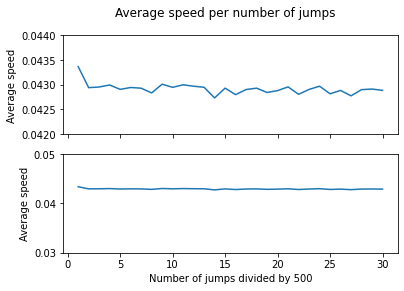

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Average speed per number of jumps")
ax1.set_xticks(range(-1, len(data)+2, 5), range(0, len(data) + 1, 5))
ax1.set_ylabel("Average speed")
ax1.set_ylim(0.042, 0.044)
ax1.plot(data)

ax2.set_xticks(range(-1, len(data)+2, 5), range(0, len(data) + 1, 5))
ax2.set_ylabel("Average speed")
ax2.set_xlabel("Number of jumps divided by 500")
ax2.set_ylim(0.03, 0.05)
ax2.plot(data)

plt.show()

As you can see from the picture, average speed does not seem to depend on number of jumps, so let's try to calculate it based on constants given earlier - jump length, probability of breaking the leg, timeout after leg was broken:

Suppose $N$ - time until next jump will be made, $J$ - jump length

$$ N =
  \begin{cases}
    1 & \text{w.p. $1-p$} \\
    31 & \text{w.p. $p$}
  \end{cases} $$

Therefore, we can calculate the expectation of time between the jumps. Let's denote as $T$ as expectation of time between the jumps:

$$\large T = 1\cdot(1-0.2) + 31\cdot0.2 = 0.8 + 6.2 = 7 $$

Now we can calculate average speed, knowing expectation of time between the jumps and jump length. When we make $n$ jumps we will take into consideration only $n-1$ periods of time between the jumps. We do not care if we will break our leg after we reach our final destination. So, let's derive formula for average speed:

$$\large V(n) = \frac{nJ}{(n-1)T+1} $$

It is easy to notice that average speed for $n\to\infty$ can be calculated as:

$$\large V = \frac{J}{T}$$

In [7]:
V = jump_length / (1 * (1 - p) + (t + 1) * p)
print(V)

0.04285714285714286


Based on the graph, that was made earlier, value of average speed seems correct.

## Sub-task 2

> Знайдiть залежнiсть середньої швидкостi 𝑣 вiд ймовiрностi 𝑝 пiдвертання ноги;

### Theoretical approach and calculations

In previous task, we found that considering $n\to\infty$, average speed can be calculated as:

$$\large V = \frac{J}{T}$$

Let's take a look into the formula of $T$:

$$\large T = 1\cdot(1 - p) + (t + 1) \cdot p$$

Where $t$ - timeout after leg was broken and $p$ - probability of breaking a leg. We can rewrite this equation:

$$\large T = 1\cdot(1 - p) + (t + 1) \cdot p = \\\large = 1 - p + pt + p = \\\large = 1 + pt$$

So, we can now find formula of $V(p)$:

$$\large V(p) = \frac{J}{1 + pt}$$

### Graph demonstration
Let's now plot the graph of $V(p)$ based on the formula and compare it to the one derived with "experimental" graph

In [8]:
def average_speed_based_on_probability(prob):
    return jump_length/(1 + prob*t)

average_speed_based_on_probability_data = []

for i in np.arange(0.01, 1, 0.01):
    average_speed_based_on_probability_data.append(
        average_speed_based_on_probability(i)
    )


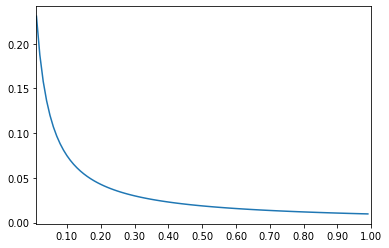

In [9]:
fig, ax = plt.subplots()

ax.plot(average_speed_based_on_probability_data)
ax.set_xticks(range(-1, 100, 10), ["{:.2f}".format(i) for i in np.arange(0, 1.1, 0.1)])
ax.set_xlim(0,99)

plt.show()